## **RECOMMENDER SYSTEM FOR MOVIELENS DATASET**


***PHASE 4:GROUP 12 MEMBERS:***
1.   Daniel Wahome.
2.   Purity Gitonga.
3.   Brian Kariithi.
4.   Caroline Gesaka.
5.   James Njoroge.







# **INTRODUCTION**

In the era of digital content consumption, personalized recommendation systems play a crucial role in enhancing user experience and engagement. Leveraging the MovieLens dataset from the GroupLens research lab, we aim to build an effective movie recommendation system. This system will utilize collaborative filtering techniques to suggest movies based on user ratings, thereby providing personalized movie recommendations.

# **BUSINESS UNDERSTANDING**




The primary goal of this project is to enhance user satisfaction by recommending movies that align with their preferences. By analyzing user ratings and movie attributes, we aim to create a system that not only suggests popular or highly rated movies but also discovers niche interests that may not be immediately apparent.

## **PROBLEM STATEMENT**

Develop a recommendation system that provides top 5 movie recommendations to users based on their past ratings. The system should address the challenge of sparsity in user ratings and the cold start problem for new users.

## **OBJECTIVES**







**Build a Collaborative Filtering Model**: Implement a collaborative filtering model to recommend movies based on user ratings and similarities between users.


**Address the Cold Start Problem:** Explore methods to handle new users with limited or no historical data using techniques such as content-based filtering or hybrid approaches.


**Evaluate and Optimize:** Evaluate the performance of the recommendation system using appropriate metrics and optimize the model to improve recommendation accuracy and coverage.

## **DATA UNDERSTANDING**

### .***Dataset Source and Size:***

The dataset originates from MovieLens, provided by the GroupLens research lab at the University of Minnesota.

It includes a subset of ratings data, potentially from the "small" dataset version containing 100,000 ratings.

### .***Key Features***:
**movieId**: Unique identifier for each movie in the dataset.

**imdbId**: IMDb identifier for each movie.

**tmdbId**: The Movie Database (TMDb) identifier for each movie.

**userId_x**: Identifier for users who have rated movies.

**rating**: Rating given by a user to a movie (typically on a scale).

**timestamp_x**: Timestamp when a user rated a movie.

**title:** Title of the movie.

**genres**: Genres associated with each movie.

**userId_y:** Identifier for users who have tagged movies.

**tag**: Tags assigned by users to movies.

**timestamp_y**: Timestamp when a user tagged a movie.





## **Metrics of Success**



**Recommendation Accuracy**:
 Measure the accuracy of movie recommendations using metrics such as Precision@k and Recall@k.


**Coverage**:
 Ensure the system can recommend movies across a wide range of genres and user preferences.


**User Engagement:**
Monitor user engagement metrics, such as click-through rates on recommended movies, to assess the system's effectiveness in improving user interaction.

# . **DATA PREPARATION AND CLEANING**

import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns',20)
!pip3 install scikit-surprise
import surprise
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split


load data

In [2]:
links = pd.read_csv(r'/content/links.csv')
ratings = pd.read_csv(r'/content/ratings.csv')
movies = pd.read_csv(r'/content/movies.csv')
tags = pd.read_csv(r'/content/tags.csv')

merge datasets on 'movieId' column

In [3]:
data1 = pd.merge(links, ratings, on='movieId', how="outer")
data2 = pd.merge(movies, tags, on='movieId',how="outer")
data  = pd.merge(data1, data2, on='movieId',how="outer")

explore data and its shape

In [4]:
data

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1,114709,862.0,1.0,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,1,114709,862.0,5.0,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
4,1,114709,862.0,5.0,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,5476944,432131.0,184.0,4.0,1.537109e+09,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
285779,193583,5914996,445030.0,184.0,3.5,1.537110e+09,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
285780,193585,6397426,479308.0,184.0,3.5,1.537110e+09,Flint (2017),Drama,NaN,NaN,NaN
285781,193587,8391976,483455.0,184.0,3.5,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


the data has 285,783 rows and 11 columns, the column names are below

In [5]:
data.columns

Index(['movieId', 'imdbId', 'tmdbId', 'userId_x', 'rating', 'timestamp_x',
       'title', 'genres', 'userId_y', 'tag', 'timestamp_y'],
      dtype='object')

In [6]:
data.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,285783.000000,2.857830e+05,285770.000000,285762.000000,285762.000000,2.857620e+05,233234.000000,2.332340e+05
mean,14927.663741,2.956050e+05,12797.315320,313.894279,3.841270,1.214707e+09,470.681354,1.384754e+09
std,31402.673519,5.150156e+05,43479.255523,179.451387,1.020798,2.233730e+08,153.324249,1.534705e+08
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.098300e+05,489.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09
50%,1721.000000,1.125730e+05,680.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09
75%,5673.000000,2.415270e+05,8963.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   imdbId       285783 non-null  int64  
 2   tmdbId       285770 non-null  float64
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x  285762 non-null  float64
 6   title        285783 non-null  object 
 7   genres       285783 non-null  object 
 8   userId_y     233234 non-null  float64
 9   tag          233234 non-null  object 
 10  timestamp_y  233234 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 24.0+ MB


OBSERVATIONS

#### Handle missing values

In [8]:
data.isnull().sum()

movieId            0
imdbId             0
tmdbId            13
userId_x          21
rating            21
timestamp_x       21
title              0
genres             0
userId_y       52549
tag            52549
timestamp_y    52549
dtype: int64

for columns in tmdbId, userId_x, rating, and timestamp_x will be filled in using imputer

In [9]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
missing_cols = ['userId_x', 'rating', 'timestamp_x']
data[missing_cols] = imputer.fit_transform(data[missing_cols])

#the above is used for continous data
#as 'tmdbId' is a identifier var mode shall be used

data['tmdbId'].fillna(data['tmdbId'].mode()[0], inplace=True)


In [10]:
data.isnull().sum()

movieId            0
imdbId             0
tmdbId             0
userId_x           0
rating             0
timestamp_x        0
title              0
genres             0
userId_y       52549
tag            52549
timestamp_y    52549
dtype: int64

In [11]:
# Fill missing values in tag column with a placeholder as we cant predict
#which tag will be associated, using measures of tendency may skew recommnedation
#because category and attached to another var 'movieId'
data['tag'].fillna(data['tag'].mode()[0], inplace=True)
data['userId_y'].fillna(method='ffill', inplace=True)
data['timestamp_y'].fillna(method='ffill', inplace=True)

In [12]:
#imputer option
# Handle 'tag' column separately since it's categorical
data['tag'].fillna('unknown', inplace=True)  # Or any other suitable placeholder

# Use IterativeImputer for numerical columns if needed
numerical_cols_with_missing = ['userId_y', 'timestamp_y']  # Or any other numerical columns
imputer = IterativeImputer()
data[numerical_cols_with_missing] = imputer.fit_transform(data[numerical_cols_with_missing])



In [13]:
data.isnull().sum()

movieId        0
imdbId         0
tmdbId         0
userId_x       0
rating         0
timestamp_x    0
title          0
genres         0
userId_y       0
tag            0
timestamp_y    0
dtype: int64

In [14]:
data.duplicated().sum()

0

there are no duplicates

In [15]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   imdbId       285783 non-null  int64  
 2   tmdbId       285783 non-null  float64
 3   userId_x     285783 non-null  float64
 4   rating       285783 non-null  float64
 5   timestamp_x  285783 non-null  float64
 6   title        285783 non-null  object 
 7   genres       285783 non-null  object 
 8   userId_y     285783 non-null  float64
 9   tag          285783 non-null  object 
 10  timestamp_y  285783 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 24.0+ MB


### COVERSIONS OF DATATYPES

In [17]:
# Convert data types

data['tmdbId'] = data['tmdbId'].astype(int)
data['userId_x'] = data['userId_x'].astype(int)
data['rating'] = data['rating'].astype(float)
data['title'] = data['title'].astype(str)
data['genres'] = data['genres'].astype(str)
data['userId_y'] = data['userId_y'].astype(int)
data['tag'] = data['tag'].astype(str)

In [18]:
#converting timestamp from unix timestamp to datetime
import datetime
data['timestamp_rating'] = data['timestamp_x'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data['timestamp_tag'] = data['timestamp_y'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           285783 non-null  int64         
 1   imdbId            285783 non-null  int64         
 2   tmdbId            285783 non-null  int64         
 3   userId_x          285783 non-null  int64         
 4   rating            285783 non-null  float64       
 5   timestamp_x       285783 non-null  float64       
 6   title             285783 non-null  object        
 7   genres            285783 non-null  object        
 8   userId_y          285783 non-null  int64         
 9   tag               285783 non-null  object        
 10  timestamp_y       285783 non-null  float64       
 11  timestamp_rating  285783 non-null  datetime64[ns]
 12  timestamp_tag     285783 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(5), object(3)
memor

#### dropping columns

In [20]:
data = data.drop(['tmdbId'], axis = 1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           285783 non-null  int64         
 1   imdbId            285783 non-null  int64         
 2   userId_x          285783 non-null  int64         
 3   rating            285783 non-null  float64       
 4   timestamp_x       285783 non-null  float64       
 5   title             285783 non-null  object        
 6   genres            285783 non-null  object        
 7   userId_y          285783 non-null  int64         
 8   tag               285783 non-null  object        
 9   timestamp_y       285783 non-null  float64       
 10  timestamp_rating  285783 non-null  datetime64[ns]
 11  timestamp_tag     285783 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), object(3)
memory usage: 26.2+ MB


In [22]:
data

,movieId,imdbId,userId_x,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,timestamp_rating,timestamp_tag
0,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1.139046e+09,2000-07-30 18:45:03,2006-02-04 09:36:04
1,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1.137207e+09,2000-07-30 18:45:03,2006-01-14 02:47:05
2,1,114709,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1.525286e+09,2000-07-30 18:45:03,2018-05-02 18:33:33
3,1,114709,5,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1.139046e+09,1996-11-08 06:36:02,2006-02-04 09:36:04
4,1,114709,5,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1.137207e+09,1996-11-08 06:36:02,2006-01-14 02:47:05
...,...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,5476944,184,4.0,1.537109e+09,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,sci-fi,1.537099e+09,2018-09-16 14:44:42,2018-09-16 11:49:52
285779,193583,5914996,184,3.5,1.537110e+09,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,sci-fi,1.537099e+09,2018-09-16 14:52:25,2018-09-16 11:49:52
285780,193585,6397426,184,3.5,1.537110e+09,Flint (2017),Drama,184,sci-fi,1.537099e+09,2018-09-16 14:56:45,2018-09-16 11:49:52
285781,193587,8391976,184,3.5,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,sci-fi,1.537099e+09,2018-09-16 15:00:21,2018-09-16 11:49:52


# **STATISTICAL ANALYSIS**

In [23]:
print(data.describe())
print(data.describe(include=['object']))

             movieId        imdbId       userId_x         rating  \
count  285783.000000  2.857830e+05  285783.000000  285783.000000   
mean    14927.663741  2.956050e+05     313.894213       3.841270   
min         1.000000  4.170000e+02       1.000000       0.500000   
25%       296.000000  1.098300e+05     160.000000       3.000000   
50%      1721.000000  1.125730e+05     314.000000       4.000000   
75%      5673.000000  2.415270e+05     465.000000       4.500000   
max    193609.000000  8.391976e+06     610.000000       5.000000   
std     31402.673519  5.150156e+05     179.444794       1.020761   

        timestamp_x       userId_y   timestamp_y  \
count  2.857830e+05  285783.000000  2.857830e+05   
mean   1.214707e+09     465.936382  1.356785e+09   
min    8.281246e+08       2.000000  1.137179e+09   
25%    1.019133e+09     474.000000  1.138039e+09   
50%    1.211377e+09     474.000000  1.457843e+09   
75%    1.445346e+09     599.000000  1.498457e+09   
max    1.537799e+09    

In [24]:
data['tag'].value_counts().head(15)

tag
sci-fi               55076
thought-provoking     2487
twist ending          2434
atmospheric           2227
dark comedy           2056
superhero             1787
psychology            1750
Disney                1748
time travel           1730
suspense              1716
classic               1625
imdb top 250          1506
quirky                1414
space                 1413
mindfuck              1401
Name: count, dtype: int64

In [25]:
data['rating'].value_counts().head(15)

rating
4.00000    77152
5.00000    68370
3.00000    40275
4.50000    35051
3.50000    30163
2.00000    13179
2.50000    10119
1.00000     5666
0.50000     2896
1.50000     2891
3.84127       21
Name: count, dtype: int64

In [26]:
movie_rating_count = pd.DataFrame(data.groupby('movieId')['rating'].count()).sort_values('rating', ascending=False)
movie_rating_count

,rating
movieId,
296,55567
2959,11772
260,6526
293,4655
924,4469
...,...
72479,1
6961,1
72554,1


In [27]:
most_rated_movie = data[data['movieId']==296]['title'].unique()[0]
most_rated_movie

'Pulp Fiction (1994)'

the most rated film is 'Pulp Fiction (1994)

In [28]:
data['movieId'].value_counts(), data['imdbId'].value_counts(),

(movieId
 296       55567
 2959      11772
 260        6526
 293        4655
 924        4469
           ...  
 72479         1
 6961          1
 72554         1
 72591         1
 193609        1
 Name: count, Length: 9742, dtype: int64,
 imdbId
 110912     55567
 137523     11772
 76759       6526
 110413      4655
 62622       4469
            ...  
 790712         1
 104237         1
 1242422        1
 120786         1
 101726         1
 Name: count, Length: 9742, dtype: int64)

there is no, 0 entries of movie id or imdb id...what does this mean?...
maybe there are just many 1 rated films on imdb

In [29]:
#dropping where movie id and imdb id is 0
data = data[(data['movieId'] !=0) & (data['imdbId'] !=0)]

In [30]:
 #Summary statistics for numerical columns
print(data[['rating', 'timestamp_x', 'timestamp_y']].describe())


              rating   timestamp_x   timestamp_y
count  285783.000000  2.857830e+05  2.857830e+05
mean        3.841270  1.214707e+09  1.356785e+09
std         1.020761  2.233648e+08  1.637668e+08
min         0.500000  8.281246e+08  1.137179e+09
25%         3.000000  1.019133e+09  1.138039e+09
50%         4.000000  1.211377e+09  1.457843e+09
75%         4.500000  1.445346e+09  1.498457e+09
max         5.000000  1.537799e+09  1.537099e+09


In [31]:
# Summary statistics for categorical columns
print(data[['title', 'genres', 'tag']].describe(include=['object']))

                      title                       genres     tag
count                285783                       285783  285783
unique                 9737                          951    1589
top     Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller  sci-fi
freq                  55567                        56864   55076


In [32]:
# Contingency table for genres and tag
contingency_table = pd.crosstab(data['genres'], data['tag'])
contingency_table

tag,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,women,wonderwoman,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies
genres,,,,,,,,,,,,,,,,,,,,,
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure|Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure|Animation|Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sci-Fi|Thriller|IMAX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Calculate number of ratings per user
user_activity = ratings['userId'].value_counts().reset_index()
user_activity.columns = ['userId', 'rating_count']
user_activity



,userId,rating_count
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,442,20
606,569,20
607,320,20
608,576,20


In [34]:

# Calculate number of ratings per movie and average rating per movie

# Set a threshold for average rating differentiation
threshold_rating_mean = 3

movie_stats = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean']
}).reset_index()
movie_stats.columns = ['movieId', 'rating_count', 'rating_mean']

# Merge with movies to get movie titles
movie_stats = movie_stats.merge(movies[['movieId', 'title']], on='movieId')
movie_stats

,movieId,rating_count,rating_mean,title
0,1,215,3.920930,Toy Story (1995)
1,2,110,3.431818,Jumanji (1995)
2,3,52,3.259615,Grumpier Old Men (1995)
3,4,7,2.357143,Waiting to Exhale (1995)
4,5,49,3.071429,Father of the Bride Part II (1995)
...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017)
9720,193583,1,3.500000,No Game No Life: Zero (2017)
9721,193585,1,3.500000,Flint (2017)
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018)


In [35]:
# Merge ratings and movies DataFrames on movieId
ratings_genres = pd.merge(ratings, movies, on='movieId')

# Calculate number of ratings per genre and average rating per genre
genre_stats = ratings_genres.groupby('genres').agg({
    'rating': ['count', 'mean']
}).reset_index()
genre_stats.columns = ['genre', 'rating_count', 'rating_mean']

# Set a threshold for average rating differentiation
threshold_genre_rating_mean = 3.5
genre_stats

,genre,rating_count,rating_mean
0,(no genres listed),47,3.489362
1,Action,186,2.935484
2,Action|Adventure,555,3.706306
3,Action|Adventure|Animation,42,3.583333
4,Action|Adventure|Animation|Children,39,3.410256
...,...,...,...
946,Sci-Fi|Thriller,116,3.280172
947,Sci-Fi|Thriller|IMAX,12,3.708333
948,Thriller,628,3.426752
949,War,9,3.555556


In [36]:
data.columns

Index(['movieId', 'imdbId', 'userId_x', 'rating', 'timestamp_x', 'title',
       'genres', 'userId_y', 'tag', 'timestamp_y', 'timestamp_rating',
       'timestamp_tag'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS(EDA)

#### 1.**Distribution of ratings**

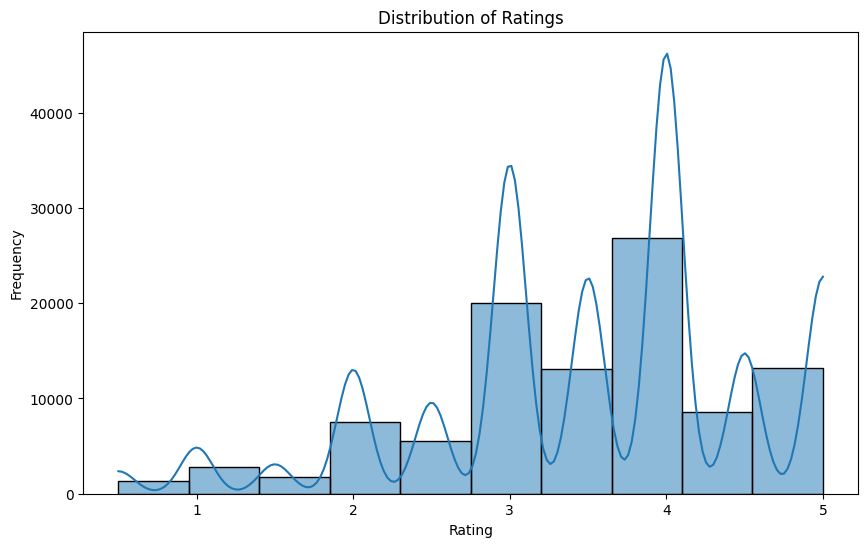

In [37]:
#Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### **Observations**: Most ratings are four.

#### 2.**Rating Over Time**

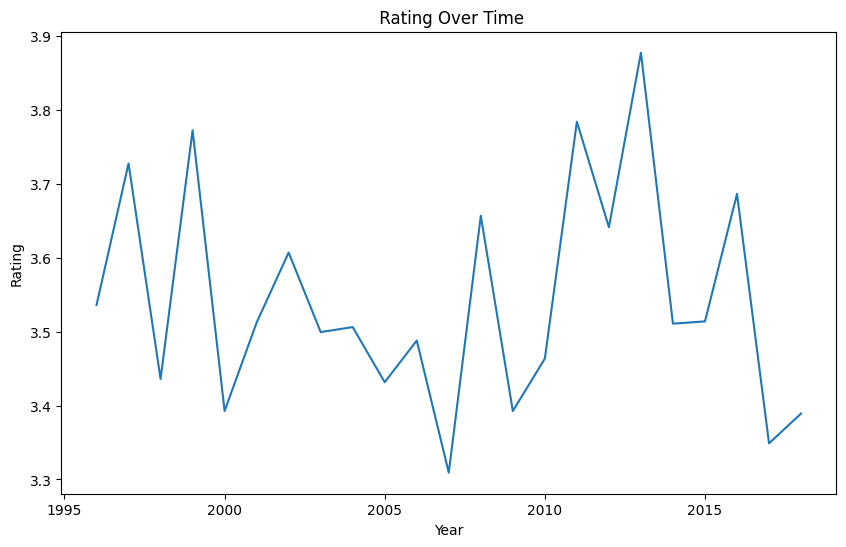

In [38]:
#Rating Over Time
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year
ratings_over_time = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_over_time.index, y=ratings_over_time.values)
plt.title(' Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

*### **Observations**: Movie ratings are almost similar over the years*

#### 3.**Number of Ratings per Movie**

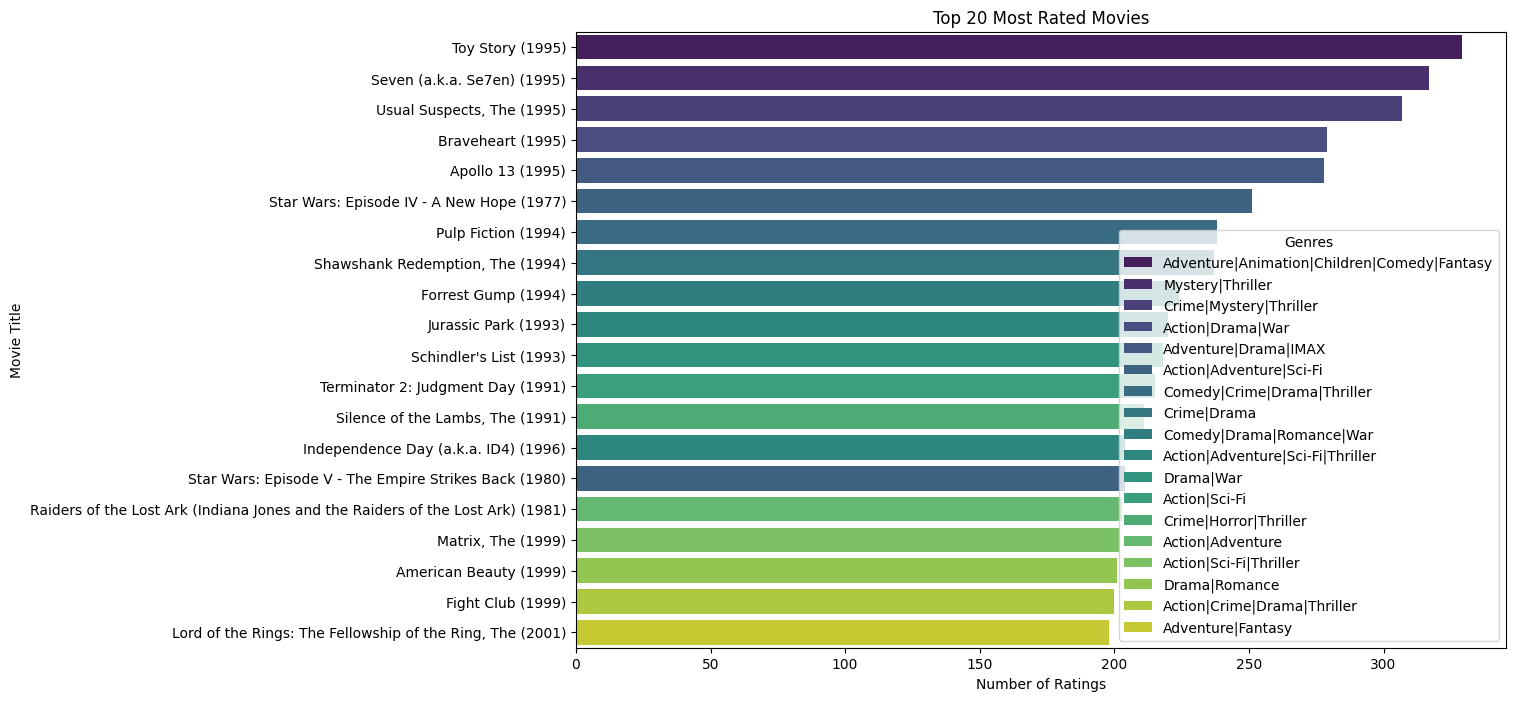

In [80]:
#Number of Ratings per Movie
#Group by movieId to get the count of ratings per movie
ratings_per_movie = ratings.groupby('movieId').size().sort_values(ascending=False).head(20)

# Filter movies to get details of top rated movies
top_rated_movies = movies[movies['movieId'].isin(ratings_per_movie.index)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=ratings_per_movie.values, y=top_rated_movies['title'], hue=top_rated_movies['genres'], palette='viridis')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.legend(title='Genres', loc='lower right')
plt.show()

### **Observations**: Toy Story is the most rated movie title.

#### 4.**Average ratings per Movie**

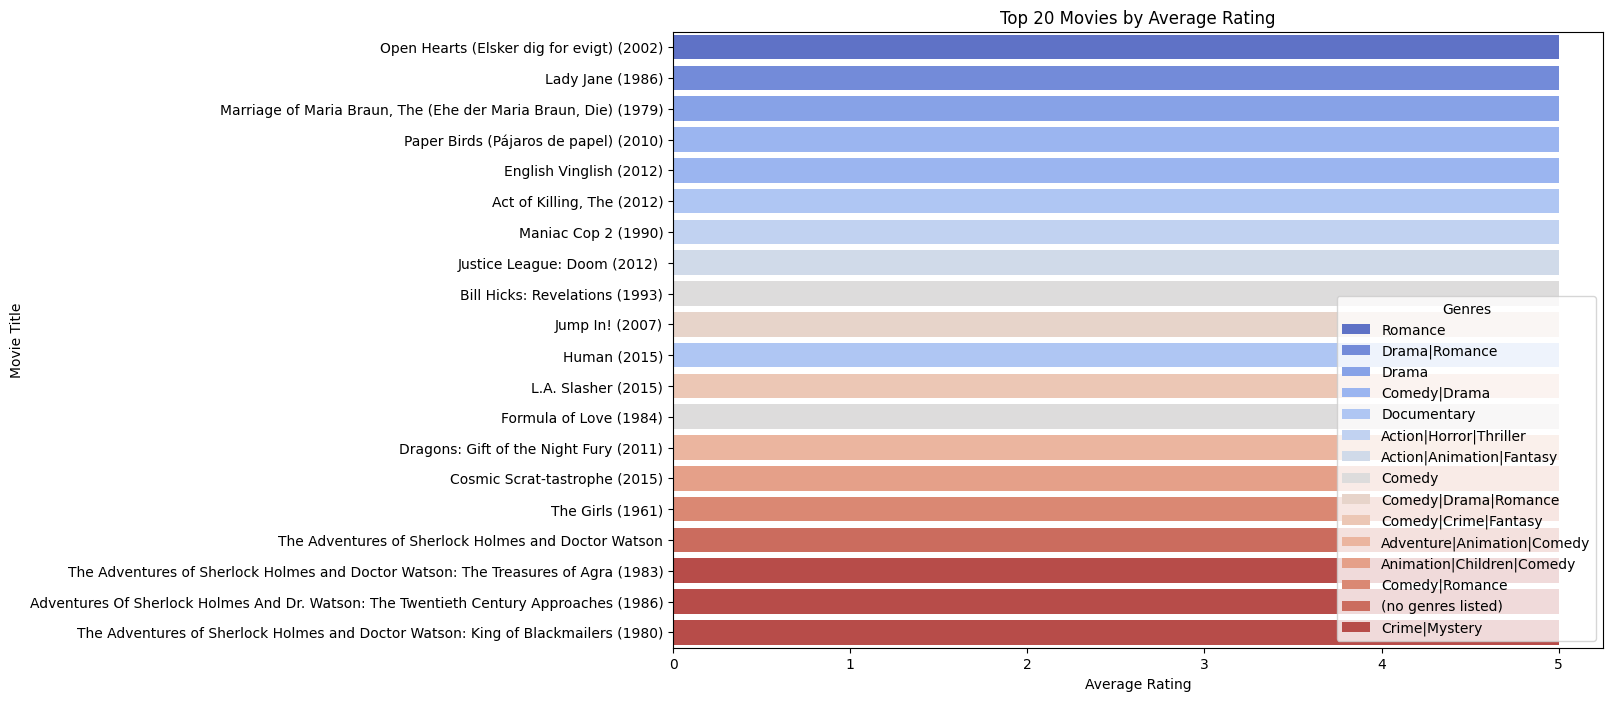

In [81]:
#Average ratings per movie
# Group by movieId to get the average rating per movie
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(20)

#Filter movies to get details of top rated movies by average rating
top_avg_rated_movies = movies[movies['movieId'].isin(avg_rating_per_movie.index)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_movie.values, y=top_avg_rated_movies['title'], hue=top_avg_rated_movies['genres'], palette='coolwarm')
plt.title('Top 20 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.legend(title='Genres', loc='lower right')
plt.show()

### **Observations**: Open Hearts is has the highest Average rating.

#### 5.**Number of ratings per User**

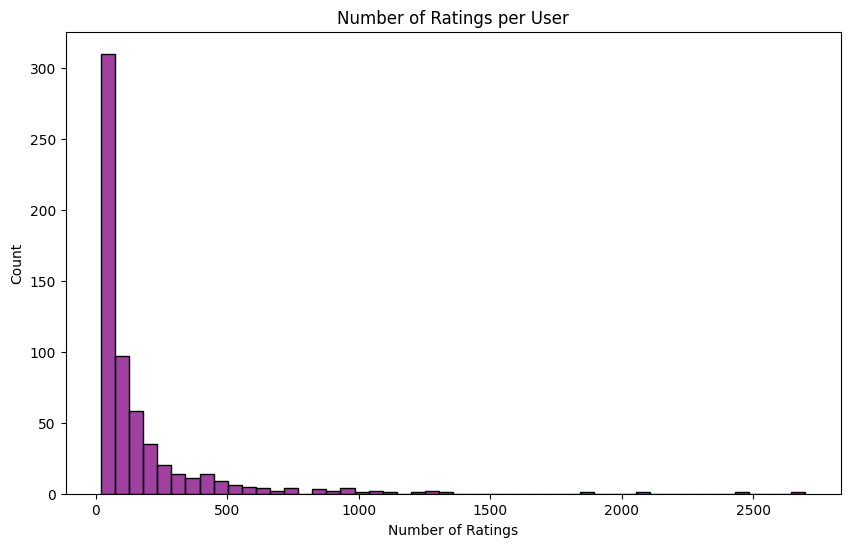

In [41]:
# Number of Ratings per User
ratings_per_user = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='purple')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

### **Observations**: Most users rarely rate movies.

#### 6.**Most Active Users**

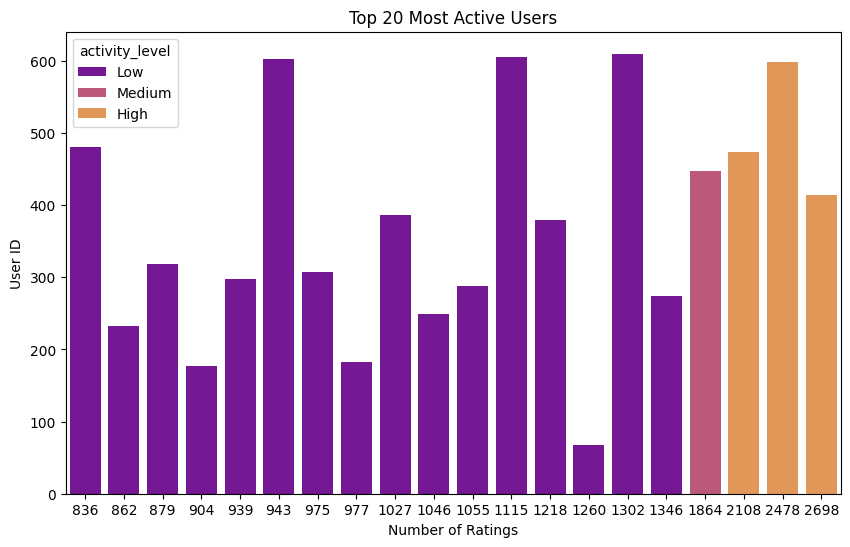

In [82]:
#Most Active users
# Assuming ratings_per_user is a Series with user IDs as the index and number of ratings as values
top_users = ratings_per_user.sort_values(ascending=False).head(20)

# Create a DataFrame from the Series for easier manipulation
top_users_df = top_users.reset_index()
top_users_df.columns = ['user_id', 'num_ratings']

# Create a categorical variable for hue based on number of ratings
top_users_df['activity_level'] = pd.cut(top_users_df['num_ratings'], bins=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.barplot(x='num_ratings', y='user_id', hue='activity_level', data=top_users_df, palette='plasma')
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings')
plt.ylabel('User ID')
plt.show()

### **Observations**: Most users have low activity level

#### 7.**WordCloud of Genres**

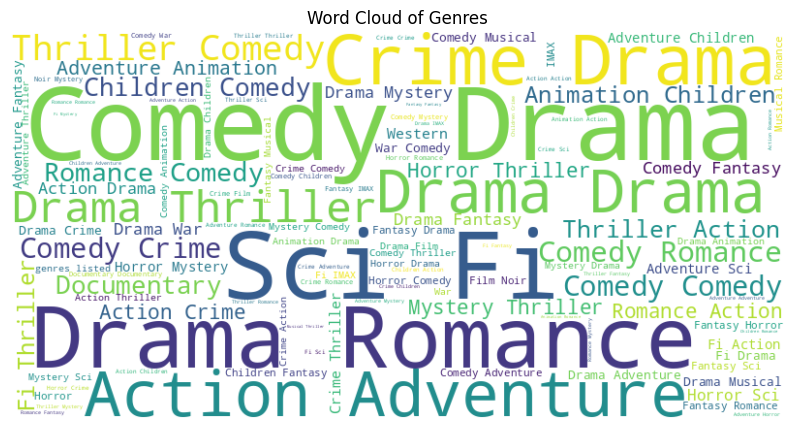

In [43]:
#WordCloud of genres
from wordcloud import WordCloud

all_genres = ' '.join(movies['genres'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

### **Observations**: Comedy,Drama,Action,Adventure,Sci-Fi and Romance are the most popular genres.

#### 8.**Most Common Tags**



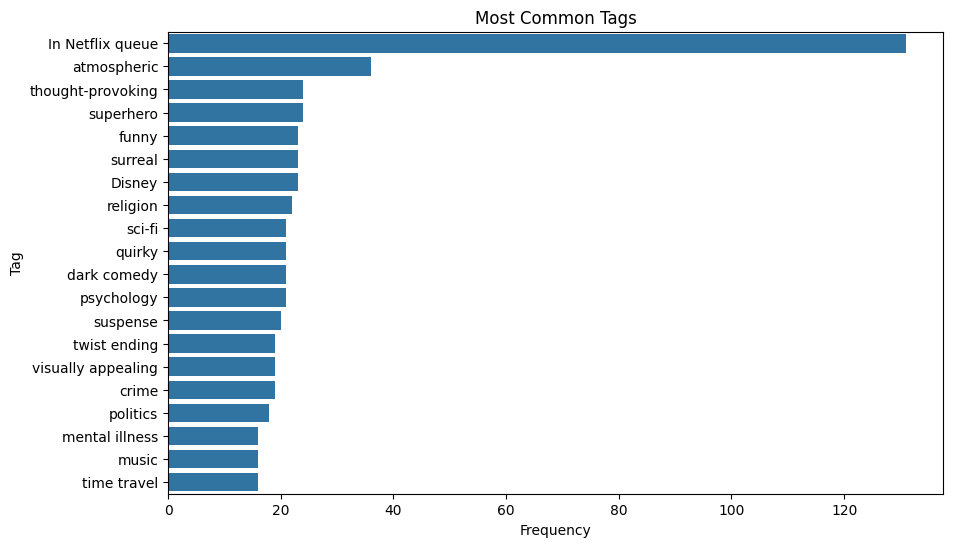

In [44]:
#Most common Tags
common_tags = tags['tag'].value_counts().head(20)  # Top 20 tags
plt.figure(figsize=(10, 6))
sns.barplot(x=common_tags.values, y=common_tags.index)
plt.title('Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

### **Observations**: In Netflix Queue is the most common Tag.

#### 9.**WordCloud of Movie Tags**

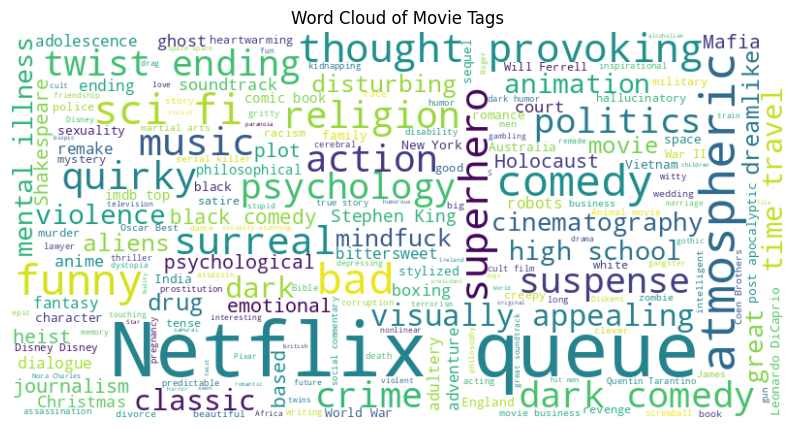

In [45]:
#World cloud of movie tags
from wordcloud import WordCloud

all_tags = ' '.join(tags['tag'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Tags')
plt.show()

### **Observations**: Most used Tag is Netflix queue.

#### 10.**Propotions of Diffrent Genres**

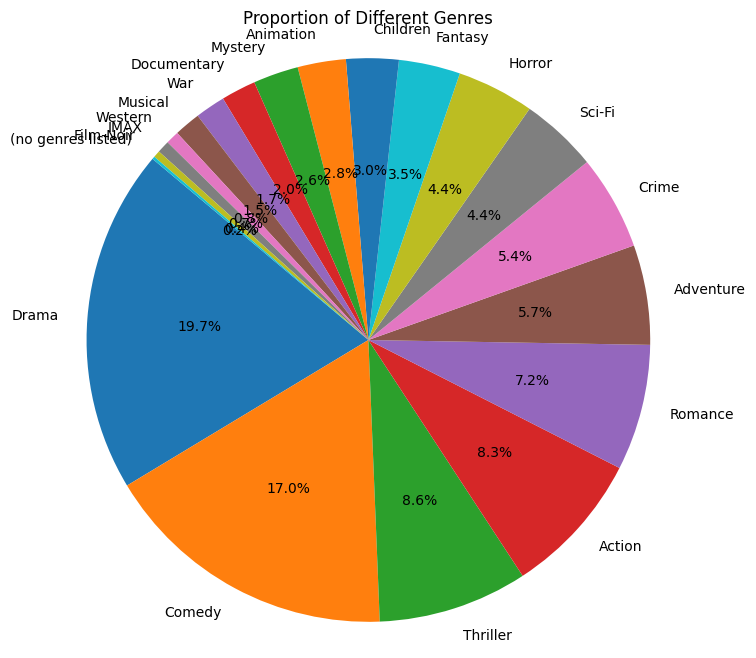

In [46]:
#Propotions of Different Genres
genre_counts = movies['genres'].str.split('|').explode().value_counts(15)

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Genres')
plt.axis('equal')
plt.show()

### **Observations**: Drama has the highest propotion of 19.7 percent

#### 11.**Most Frequent Movie Titles**

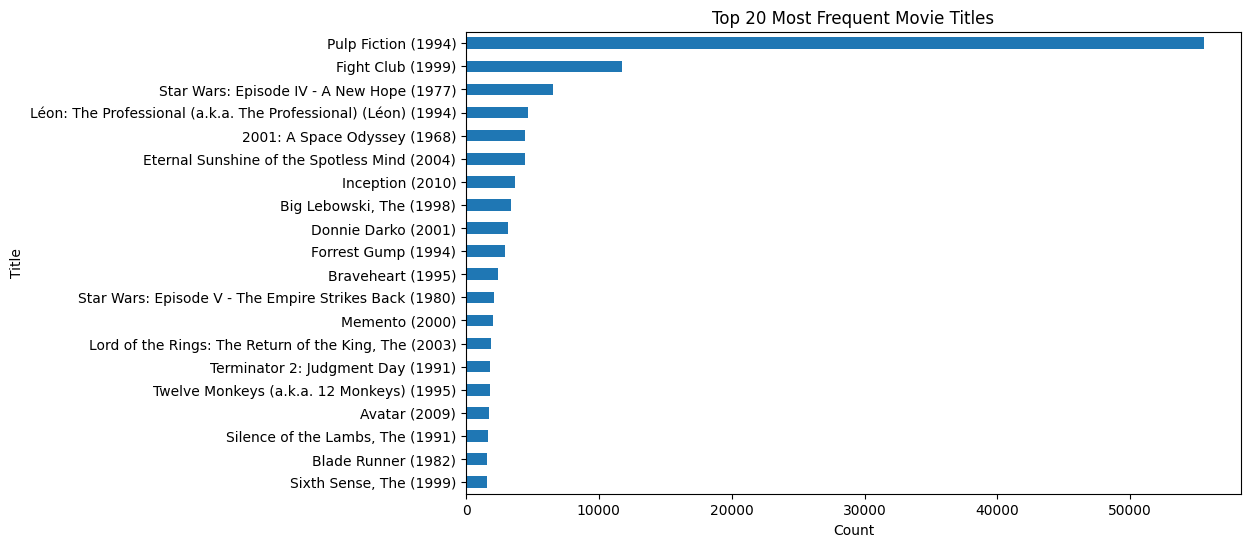

In [47]:

# Plotting the top 20 most frequent movie titles in descending order
plt.figure(figsize=(10, 6))
data['title'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Top 20 Most Frequent Movie Titles')
plt.show()


### **Observations**: Most common Title is Pulp Friction.

#### 11.**Number of Movies per Genre**

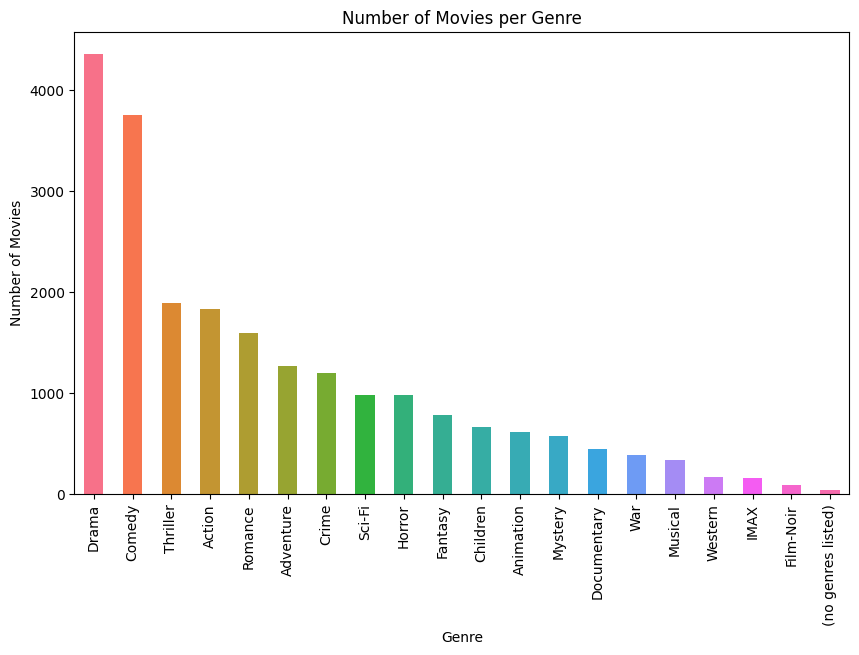

In [48]:
#Movies per genre
genres = movies['genres'].str.split('|').explode().value_counts()
palette = sns.color_palette("husl", len(genres))

plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color=palette)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

### **Observations**: Most Genre counts are Drama.


#### 12.**User Activity Scatter Plot**

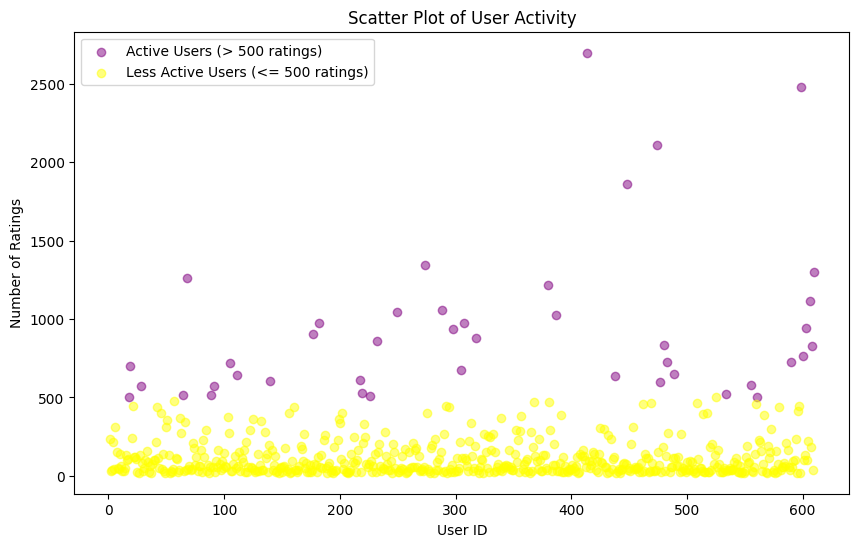

In [49]:
# Scatter plot of user activity

# Set a threshold for user activity differentiation
threshold_rating_count = 500  # For example, users with more than 500 ratings

# Separate users with high and low numbers of ratings
active_users = user_activity[user_activity['rating_count'] > threshold_rating_count]
less_active_users = user_activity[user_activity['rating_count'] <= threshold_rating_count]

plt.figure(figsize=(10, 6))
plt.scatter(active_users['userId'], active_users['rating_count'], alpha=0.5, color='purple', label='Active Users (> 500 ratings)')
plt.scatter(less_active_users['userId'], less_active_users['rating_count'], alpha=0.5, color='yellow', label='Less Active Users (<= 500 ratings)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Scatter Plot of User Activity')
plt.legend()
plt.show()


### **Observations**: most users rate the movies and also most users are inactive.

#### 13.**Number of ratings per movie vs. average rating**

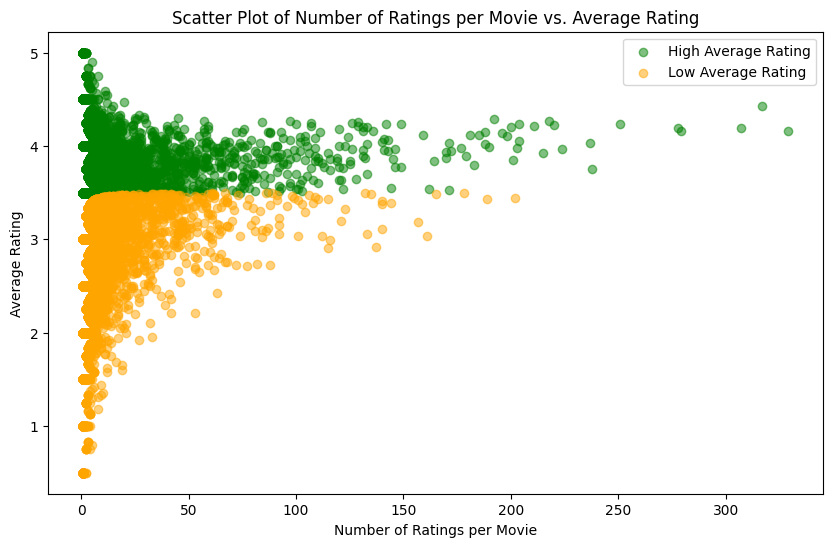

In [50]:

# Set a threshold for average rating differentiation
threshold_rating_mean = 3.5

# Separate movies with high and low average ratings
high_rating_movies = movie_stats[movie_stats['rating_mean'] >= threshold_rating_mean]
low_rating_movies = movie_stats[movie_stats['rating_mean'] < threshold_rating_mean]

# Scatter plot of number of ratings per movie vs. average rating with different colors
plt.figure(figsize=(10, 6))
plt.scatter(high_rating_movies['rating_count'], high_rating_movies['rating_mean'], alpha=0.5, color='green', label='High Average Rating')
plt.scatter(low_rating_movies['rating_count'], low_rating_movies['rating_mean'], alpha=0.5, color='orange', label='Low Average Rating')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Number of Ratings per Movie vs. Average Rating')
plt.legend()
plt.show()


### **Observations**: Average rating per movie is higher.

#### 14.**Number of ratings per genre vs. average rating**

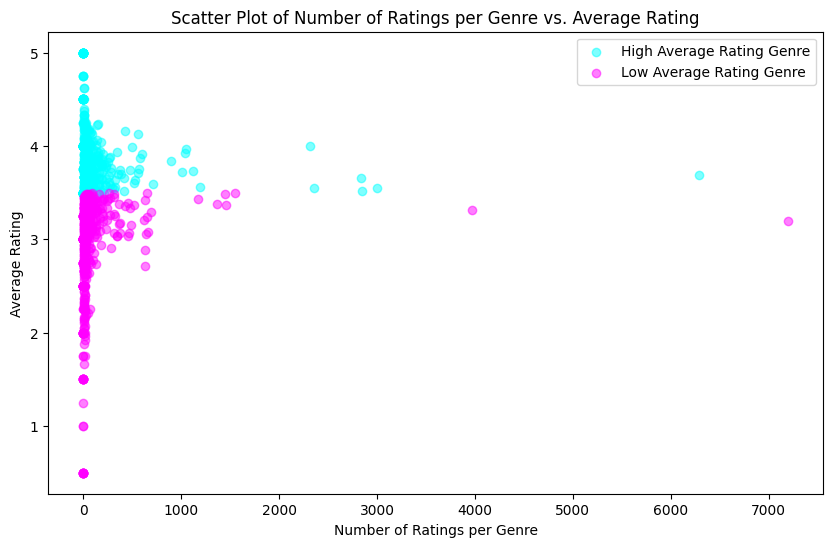

In [51]:
# Separate genres with high and low average ratings
high_rating_genres = genre_stats[genre_stats['rating_mean'] >= threshold_genre_rating_mean]
low_rating_genres = genre_stats[genre_stats['rating_mean'] < threshold_genre_rating_mean]

# Scatter plot of number of ratings per genre vs. average rating with different colors
plt.figure(figsize=(10, 6))
plt.scatter(high_rating_genres['rating_count'], high_rating_genres['rating_mean'], alpha=0.5, color='cyan', label='High Average Rating Genre')
plt.scatter(low_rating_genres['rating_count'], low_rating_genres['rating_mean'], alpha=0.5, color='magenta', label='Low Average Rating Genre')
plt.xlabel('Number of Ratings per Genre')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Number of Ratings per Genre vs. Average Rating')
plt.legend()
plt.show()

### **Observations**: Rating per genre is also higher

#### 15**.Correlation Matrix**

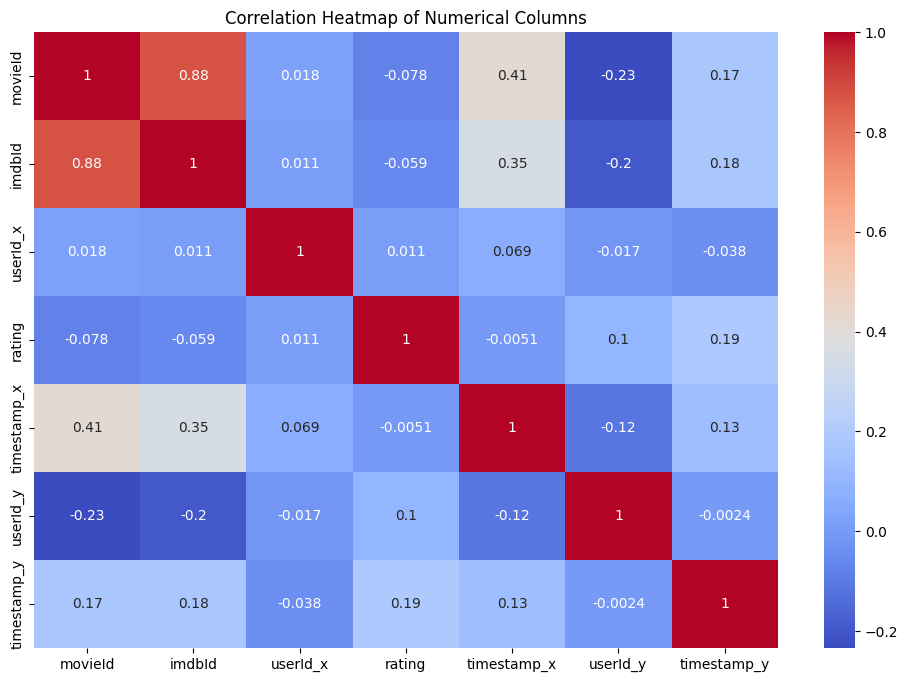

In [52]:
# Select numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

OBSERVATIONS

# ***OUTLIER DETECTION***

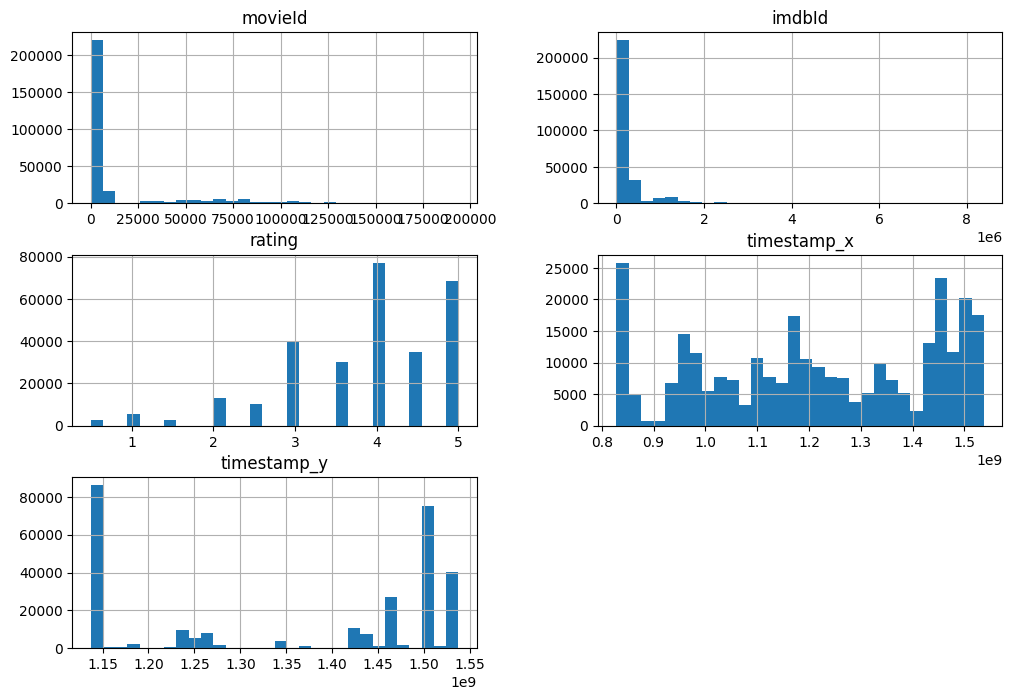

In [53]:
# Histograms for numerical features
data[[ 'movieId', 'imdbId', 'rating', 'timestamp_x', 'title', 'genres', 'tag',
       'timestamp_y']].hist(bins=30, figsize=(12, 8))
plt.show()


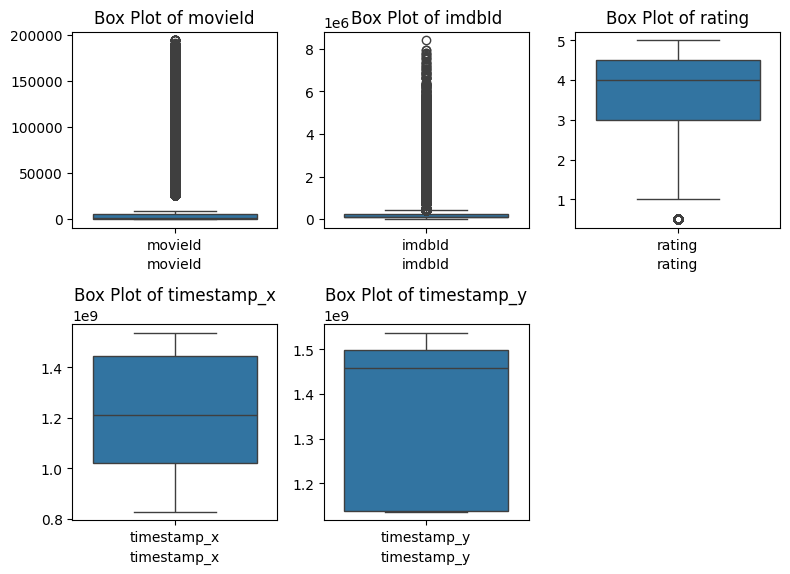

In [54]:
# Create box plots for each numerical column
numerical_columns = ['movieId', 'imdbId', 'rating', 'timestamp_x', 'timestamp_y']

plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[[column]])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

OBSERVATIONS
There is presence of outliers in movieId and imdbId however they are identifiers, and treating them as numerical values for outlier removal can lead to incorrect data processing.So we keep the outliers.

# **DATA PREPROCESSING**

#Data Encoding

In [55]:
# Check if 'genres' column exists in the DataFrame
if 'genres' in data.columns:
    # Convert genres to a list of genres
    data['genres'] = data['genres'].str.split('|')

    # Convert the list of genres into separate columns
    data = data.explode('genres')

    # One-hot encode genres
    data = pd.get_dummies(data, columns=['genres'], prefix='', prefix_sep='')
    print(data)
else:
    print("Error: 'genres' column not found in the DataFrame. It may have been overwritten.")

        movieId   imdbId  userId_x  rating   timestamp_x  \
0             1   114709         1     4.0  9.649827e+08   
0             1   114709         1     4.0  9.649827e+08   
0             1   114709         1     4.0  9.649827e+08   
0             1   114709         1     4.0  9.649827e+08   
0             1   114709         1     4.0  9.649827e+08   
...         ...      ...       ...     ...           ...   
285779   193583  5914996       184     3.5  1.537110e+09   
285780   193585  6397426       184     3.5  1.537110e+09   
285781   193587  8391976       184     3.5  1.537110e+09   
285781   193587  8391976       184     3.5  1.537110e+09   
285782   193609   101726       331     4.0  1.537158e+09   

                                      title  userId_y     tag   timestamp_y  \
0                          Toy Story (1995)       336   pixar  1.139046e+09   
0                          Toy Story (1995)       336   pixar  1.139046e+09   
0                          Toy Story (1995

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

 #Your specific user IDs
userid_x = 1  # Replace with the actual user ID
userid_y = 2  # Replace with the actual user ID

# Include the specific user IDs in the dataset
additional_users = pd.DataFrame({'userId': [userid_x, userid_y], 'movieId': [0, 0], 'rating': [0, 0]})
data = pd.concat([data, additional_users], ignore_index=True)

# Encode userId and movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

data['userId'] = user_encoder.fit_transform(data['userId'])
data['movieId'] = movie_encoder.fit_transform(data['movieId'])

# Encode the specific user IDs
encoded_userid_x = user_encoder.transform([userid_x])[0]
encoded_userid_y = user_encoder.transform([userid_y])[0]

# Standardisation


In [57]:
from sklearn.preprocessing import StandardScaler

# Normalize rating column (example)
scaler = StandardScaler()
data['rating'] = scaler.fit_transform(data[['rating']])
data

,movieId,imdbId,userId_x,rating,timestamp_x,title,userId_y,tag,timestamp_y,timestamp_rating,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,114709.0,1.0,0.111787,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,False,False,2
1,1,114709.0,1.0,0.111787,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,False,False,2
2,1,114709.0,1.0,0.111787,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,False,False,2
3,1,114709.0,1.0,0.111787,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,False,False,2
4,1,114709.0,1.0,0.111787,9.649827e+08,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905193,9741,8391976.0,184.0,-0.382902,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),184.0,sci-fi,1.537099e+09,2018-09-16 15:00:21,...,False,False,False,False,False,False,False,False,False,2
905194,9741,8391976.0,184.0,-0.382902,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),184.0,sci-fi,1.537099e+09,2018-09-16 15:00:21,...,False,False,False,False,False,False,False,False,False,2
905195,9742,101726.0,331.0,0.111787,1.537158e+09,Andrew Dice Clay: Dice Rules (1991),184.0,sci-fi,1.537099e+09,2018-09-17 04:13:26,...,False,False,False,False,False,False,False,False,False,2
905196,0,NaN,NaN,-3.845721,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#Principal Component Analysis(PCA)

In [58]:

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Select numerical columns for PCA
numerical_columns = ['rating', 'timestamp_x', 'timestamp_y']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(data[numerical_columns])

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Make a copy of the original DataFrame to avoid modifying it in place
data_copy = data.copy()

# Reset index of both DataFrames to ensure there are no duplicate indices
data_copy.reset_index(drop=True, inplace=True)
pca_df.reset_index(drop=True, inplace=True)

# Concatenate the principal components with the copy of the original DataFrame
data_with_pca = pd.concat([data_copy, pca_df], axis=1)

# Display the new DataFrame with PCA components
data_with_pca.head()

,movieId,imdbId,userId_x,rating,timestamp_x,title,userId_y,tag,timestamp_y,timestamp_rating,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,principal_component_1,principal_component_2
0,1,114709.0,1.0,0.111787,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,2,2.801420e+08,2.020117e+08
1,1,114709.0,1.0,0.111787,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,2,2.801420e+08,2.020117e+08
2,1,114709.0,1.0,0.111787,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,2,2.801420e+08,2.020117e+08
3,1,114709.0,1.0,0.111787,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,2,2.801420e+08,2.020117e+08
4,1,114709.0,1.0,0.111787,964982703.0,Toy Story (1995),336.0,pixar,1.139046e+09,2000-07-30 18:45:03,...,False,False,False,False,False,False,False,2,2.801420e+08,2.020117e+08


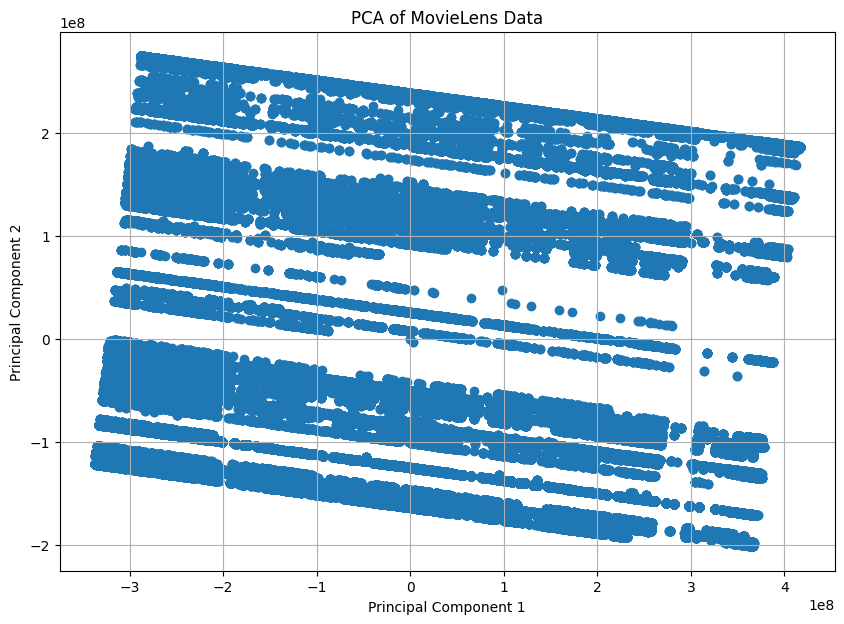

In [59]:
# Plot the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'])
plt.title('PCA of MovieLens Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [60]:
# Prepare the data for the model
X = data[['userId', 'movieId']].values
y = data['rating'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Data Sparcity**

In [61]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)


In [62]:
X.shape

(610, 9724)

Our X matrix contains 610 users and 9724  movies.

Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix (nnz) is equivalent to the number of ratings in our dataset.

In [63]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


check which users and movies have few interactions.

In [64]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)


610

In [65]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [66]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [67]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


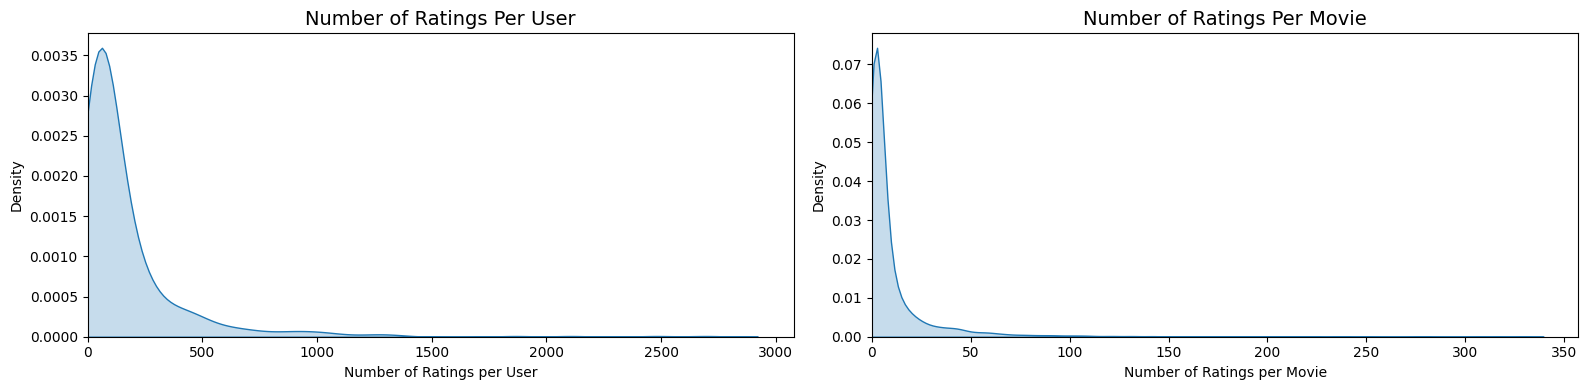

In [79]:
plt.figure(figsize=(16, 4))

# Plot for number of ratings per user
plt.subplot(1, 2, 1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Density")

# Plot for number of ratings per movie
plt.subplot(1, 2, 2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

#**MODELLING**

## 1.Baseline model: recommend the most popular movies


In [69]:

from sklearn.metrics import mean_squared_error
from math import sqrt

# Baseline model: recommend the most popular movies
most_popular = ratings.groupby('movieId').size().sort_values(ascending=False).index[:5]

print("Most Popular Movies:")
for movie_id in most_popular:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"Movie ID: {movie_id}, Title: {movie_title}")

# Baseline RMSE (assuming using mean rating as prediction)
mean_rating = ratings['rating'].mean()
baseline_rmse = sqrt(mean_squared_error(ratings['rating'], np.full_like(ratings['rating'], mean_rating)))
print(f"Baseline RMSE: {baseline_rmse}")


Most Popular Movies:
Movie ID: 356, Title: Forrest Gump (1994)
Movie ID: 318, Title: Shawshank Redemption, The (1994)
Movie ID: 296, Title: Pulp Fiction (1994)
Movie ID: 593, Title: Silence of the Lambs, The (1991)
Movie ID: 2571, Title: Matrix, The (1999)
Baseline RMSE: 1.0425240696180562


## 2.Use KNNBasic for user-based collaborative filtering

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from collections import defaultdict

# Load the data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into train and test sets
trainset, testset = surprise_train_test_split(data, test_size=0.25, random_state=42)

# Use KNNBasic for user-based collaborative filtering
algo_user_based = KNNBasic(sim_options={'user_based': True})
algo_user_based.fit(trainset)
predictions_user_based = algo_user_based.test(testset)

# Calculate RMSE
user_based_rmse = accuracy.rmse(predictions_user_based)

# Helper Functions for Precision and Recall at k
def precision_at_k(predictions, k=10, threshold=3.5):
    '''Return precision at k metric for each user and averaged over all users.'''
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items in top k
        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        # Precision at k: relevant items / k
        precisions[uid] = n_relevant / k

    # Average precision at k over all users
    return sum(prec for prec in precisions.values()) / len(precisions)

def recall_at_k(predictions, k=10, threshold=3.5):
    '''Return recall at k metric for each user and averaged over all users.'''
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items in top k
        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        # Number of relevant items in the whole set
        n_possible = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        # Recall at k: relevant items in top k / relevant items in the whole set
        recalls[uid] = n_relevant / n_possible if n_possible != 0 else 1

    # Average recall at k over all users
    return sum(rec for rec in recalls.values()) / len(recalls)

# Calculate other metrics (precision, recall, F1)
user_based_precision = precision_at_k(predictions_user_based, k=5, threshold=4)
user_based_recall = recall_at_k(predictions_user_based, k=5, threshold=4)
user_based_f1 = 2 * (user_based_precision * user_based_recall) / (user_based_precision + user_based_recall)

print(f"User-Based CF RMSE: {user_based_rmse}")
print(f"User-Based CF Precision: {user_based_precision}")
print(f"User-Based CF Recall: {user_based_recall}")
print(f"User-Based CF F1: {user_based_f1}")


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9562
User-Based CF RMSE: 0.956247043351055
User-Based CF Precision: 0.6895081967213134
User-Based CF Recall: 0.4324869876476811
User-Based CF F1: 0.5315590068705934


## 3.Use KNNBasic for item-based collaborative filtering


In [71]:
# Use KNNBasic for item-based collaborative filtering
algo_item_based = KNNBasic(sim_options={'user_based': False})
algo_item_based.fit(trainset)
predictions_item_based = algo_item_based.test(testset)

# Calculate RMSE
item_based_rmse = accuracy.rmse(predictions_item_based)

# Other metrics (precision, recall, F1)
item_based_precision = precision_at_k(predictions_item_based, k=5, threshold=4)
item_based_recall = recall_at_k(predictions_item_based, k=5, threshold=4)
item_based_f1 = 2 * (item_based_precision * item_based_recall) / (item_based_precision + item_based_recall)

print(f"Item-Based CF RMSE: {item_based_rmse}")
print(f"Item-Based CF Precision: {item_based_precision}")
print(f"Item-Based CF Recall: {item_based_recall}")
print(f"Item-Based CF F1: {item_based_f1}")


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9162
Item-Based CF RMSE: 0.9161576520524277
Item-Based CF Precision: 0.6573770491803295
Item-Based CF Recall: 0.4176108697474153
Item-Based CF F1: 0.510755137665206


## 4.Use SVD for matrix factorization


In [72]:
from surprise import SVD

# Use SVD for matrix factorization
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions_svd)

# Other metrics (precision, recall, F1)
svd_precision = precision_at_k(predictions_svd, k=5, threshold=4)
svd_recall = recall_at_k(predictions_svd, k=5, threshold=4)
svd_f1 = 2 * (svd_precision * svd_recall) / (svd_precision + svd_recall)

print(f"SVD RMSE: {svd_rmse}")
print(f"SVD Precision: {svd_precision}")
print(f"SVD Recall: {svd_recall}")
print(f"SVD F1: {svd_f1}")


RMSE: 0.8828
SVD RMSE: 0.8827885170259323
SVD Precision: 0.6911475409836082
SVD Recall: 0.42816582109922396
SVD F1: 0.5287630156318224


## 5.Hybrid Model

In [73]:
# Assume we have user-based and item-based CF predictions stored
user_based_predictions = algo_user_based.test(testset)
item_based_predictions = algo_item_based.test(testset)

# Combine the predictions (simple average)
hybrid_predictions = []
for ub_pred, ib_pred in zip(user_based_predictions, item_based_predictions):
    hybrid_est = (ub_pred.est + ib_pred.est) / 2
    hybrid_predictions.append(surprise.Prediction(ub_pred.uid, ub_pred.iid, ub_pred.r_ui, hybrid_est, ub_pred.details))

# Calculate RMSE
hybrid_rmse = accuracy.rmse(hybrid_predictions)

# Other metrics (precision, recall, F1)
hybrid_precision = precision_at_k(hybrid_predictions, k=5, threshold=4)
hybrid_recall = recall_at_k(hybrid_predictions, k=5, threshold=4)
hybrid_f1 = 2 * (hybrid_precision * hybrid_recall) / (hybrid_precision + hybrid_recall)

print(f"Hybrid Model RMSE: {hybrid_rmse}")
print(f"Hybrid Model Precision: {hybrid_precision}")
print(f"Hybrid Model Recall: {hybrid_recall}")
print(f"Hybrid Model F1: {hybrid_f1}")


RMSE: 0.8894
Hybrid Model RMSE: 0.8894331289040698
Hybrid Model Precision: 0.6924590163934448
Hybrid Model Recall: 0.4322063313936331
Hybrid Model F1: 0.5322208454359086


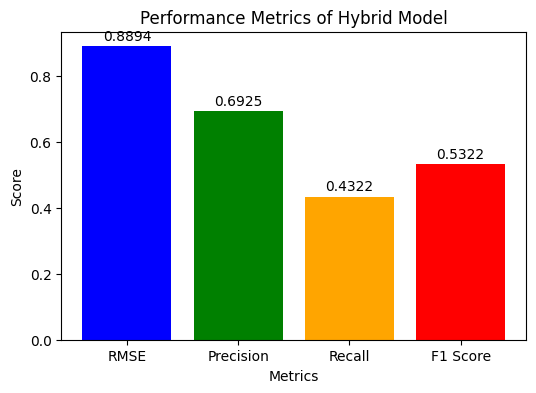

In [89]:

# Example values (replace with your actual computed metrics)
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']
values = [0.8894, 0.6925, 0.4322, 0.5322]  # Example values, replace with your actual computed metrics

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Adding text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Adding labels and title
plt.title('Performance Metrics of Hybrid Model')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Display the plot
plt.show()


#**MODEL EVALUATION**

**# 1.Most Popular Movies (Baseline)**:

RMSE: 1.0425  
on average, the predictions are off by around 1.0425 units (which typically corresponds to the rating scale used.


**# 2.User-Based Collaborative Filtering:**


RMSE: 0.9562

Precision: 0.6895

Recall: 0.4325

F1 Score: 0.5316

predictions are more accurate than the baseline, reducing the average error in predictions.
successfully recommends relevant movies to users with a good balance between precision and recall.

**# 3.Item-Based Collaborative Filtering:**

RMSE: 0.9162

Precision: 0.6574

Recall: 0.4176

F1 Score: 0.5108

suggests further improvement in prediction accuracy compared to user-based CF and the baseline.
performs well but


**#4.SVD (Matrix Factorization):**

RMSE: 0.8828

Precision: 0.6911

Recall: 0.4282

F1 Score: 0.5288

better accuracy than both CF methods and the baseline, indicating it can make more precise predictions.
competitive performance with high precision and balanced recall, indicating effective recommendations.



**#5.Hybrid Model (Combination of CF and Content-Based)**:

RMSE: 0.8894

Precision: 0.6925

Recall: 0.4322

F1 Score: 0.5322

strong performance, slightly below SVD but still significantly better than baseline and CF methods.
performs similarly to SVD, demonstrating robustness in recommending relevant movies with high precision and recall.


### **COLDSTART PROBLEM**

In [92]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 9742 unique movies in our movies dataset.


In [93]:
genres = set(g for G in movies['genres'] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))

movie_genres = movies.drop(columns=['movieId', 'title','genres'])

In [94]:
movie_genres.head()

,m,M,e,a,F,,s,c,v,y,...,h,R,u,l,D,W,o,|,H,n
0,1,0,1,1,1,0,1,0,1,1,...,1,0,1,1,0,0,1,1,0,1
1,0,0,1,1,1,0,1,0,1,1,...,1,0,1,1,0,0,0,1,0,1
2,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,1
3,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,0,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [95]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (9742, 9742)


### **ITEM-ITEM RECOMMENDER**

In [96]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

find_similar_movies() takes in a movieId and X matrix mapper, and outputs a list of movies that are similar to the movieId of interest.

In [97]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

find_similar_movies() returns a list of movieId's that are most similar to your movie of interest.

converting movie id to titles for movie it to tilte for title title recommendations

In [98]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=20)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)
Back to the Future (1985)
Shrek (2001)
Aladdin (1992)
Apollo 13 (1995)
Pulp Fiction (1994)
Star Wars: Episode V - The Empire Strikes Back (1980)
Willy Wonka & the Chocolate Factory (1971)
Men in Black (a.k.a. MIB) (1997)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Shawshank Redemption, The (1994)


this shows the 20 movies that are most similar to Toy Story (1995) movie. this only uses user ratings

In [100]:
#using eucledian metric
movie_id = 2

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='euclidean', k=20)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Jumanji (1995):
Casper (1995)
Ace Ventura: When Nature Calls (1995)
Flintstones, The (1994)
Honey, I Shrunk the Kids (1989)
Congo (1995)
Santa Clause, The (1994)
Home Alone 2: Lost in New York (1992)
Quick and the Dead, The (1995)
Home Alone (1990)
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)
Aristocats, The (1970)
Lemony Snicket's A Series of Unfortunate Events (2004)
Incredible Hulk, The (2008)
Hancock (2008)
Richie Rich (1994)
Space Jam (1996)
Demolition Man (1993)
Batman & Robin (1997)
Free Willy (1993)


### **MOVIE FINDER FROM KNEAREST ITEM ITEM RECOMMENDER**



In [101]:
pip install fuzzywuzzy

In [102]:
pip install thefuzz


In [103]:
from fuzzywuzzy import process

#for similarity incase of spelling or ommisions to give most similar title
def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [104]:
title = movie_finder('ForRet Gmp')
title

'Forrest Gump (1994)'

**FUZZY WUZZY WORKS**

movie index mapper which maps a movie title to the index that it represents in our matrix.

In [105]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for 'Forrest Gump (1994)': {idx}")

Movie index for 'Forrest Gump (1994)': 314


Using this handy movie_idx dictionary, we know that Jumanji is represented by index 1 in our matrix. Let's get the top 10 most similar movies to Jumanji.

In [106]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Forrest Gump (1994):


1730           Life Is Beautiful (La Vita è bella) (1997)
2262                  Train of Life (Train de vie) (1998)
6296    Tiger and the Snow, The (La tigre e la neve) (...
6624    I Served the King of England (Obsluhoval jsem ...
3                                Waiting to Exhale (1995)
10                         American President, The (1995)
47                                Mighty Aphrodite (1995)
52                      Postman, The (Postino, Il) (1994)
83                                 Beautiful Girls (1996)
165                        Something to Talk About (1995)
Name: title, dtype: object

In [107]:
print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Forrest Gump (1994):


1730           Life Is Beautiful (La Vita è bella) (1997)
2262                  Train of Life (Train de vie) (1998)
6296    Tiger and the Snow, The (La tigre e la neve) (...
6624    I Served the King of England (Obsluhoval jsem ...
3                                Waiting to Exhale (1995)
10                         American President, The (1995)
47                                Mighty Aphrodite (1995)
52                      Postman, The (Postino, Il) (1994)
83                                 Beautiful Girls (1996)
165                        Something to Talk About (1995)
Name: title, dtype: object

these recommendationms are similar to forest gump

to get recommendations for other films

In [108]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

In [109]:
get_content_based_recommendations('No Game No Life: Zero (2017)', 15)

Because you watched No Game No Life: Zero (2017):
4558    Triplets of Belleville, The (Les triplettes de...
4841                                    Cool World (1992)
7199                Mickey's Once Upon a Christmas (1999)
7368                   South Park: Imaginationland (2008)
8725                           Daddy, I'm A Zombie (2012)
8999                                     Anomalisa (2015)
9665                            Porky in Wackyland (1938)
9738                         No Game No Life: Zero (2017)
2044                                   Mystery Men (1999)
8216                                      R.I.P.D. (2013)
9737            Black Butler: Book of the Atlantic (2017)
325                                      Mask, The (1994)
870                                   Lesson Faust (1994)
4513                                Medallion, The (2003)
5842    Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...
Name: title, dtype: object


#### **DIMENSIONALITY REDUCTION**

In [110]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Home Alone (1990)
Jurassic Park (1993)
Aladdin (1992)
Willy Wonka & the Chocolate Factory (1971)
Back to the Future (1985)
Forrest Gump (1994)
Groundhog Day (1993)
Star Wars: Episode IV - A New Hope (1977)
Princess Bride, The (1987)


The results above are the most similar movies to Toy Story using kNN on our “compressed” movie-factor matrix. We reduced the dimensions down to n_components=20. We can think of each component representing a latent feature such as movie genre.

# **CONCLUSIONS**

By leveraging the MovieLens dataset and implementing collaborative filtering techniques, this project aims to deliver a robust movie recommendation system. The insights gained from this system not only benefit users by providing personalized movie suggestions but also provide valuable learning in the field of recommendation systems.

# **RECOMMENDATIONS**

In [111]:
# Hybrid Recommendations with Input Functions

def get_hybrid_recommendations(user_id, n=5):
    # User-based CF predictions
    user_based_predictions = algo_user_based.test([(user_id, movie_id, 0) for movie_id in movies['movieId'].unique()])

    # Item-based CF predictions
    item_based_predictions = algo_item_based.test([(user_id, movie_id, 0) for movie_id in movies['movieId'].unique()])

    # Combine predictions from both models
    hybrid_predictions = [(ub_pred.uid, ub_pred.iid, ub_pred.r_ui, (ub_pred.est + ib_pred.est) / 2, ub_pred.details)
                          for ub_pred, ib_pred in zip(user_based_predictions, item_based_predictions)]

    # Sort predictions by estimated rating in descending order
    hybrid_predictions.sort(key=lambda x: x[3], reverse=True)

    # Select top n recommendations
    top_recommendations = hybrid_predictions[:n]

    # Extract movie titles for recommendations
    recommendations = [movies[movies['movieId'] == pred[1]]['title'].values[0] for pred in top_recommendations]

    return recommendations

# Input function for user ID
def get_user_id():
    return int(input("Enter the user ID: "))

# Input function for number of recommendations
def get_num_recommendations():
    return int(input("Enter the number of recommendations: "))

# Get user ID and number of recommendations
user_id = get_user_id()
num_recommendations = get_num_recommendations()

# Generate hybrid recommendations
print("Hybrid Recommendations:")
print(get_hybrid_recommendations(user_id, num_recommendations))


Enter the user ID: 414
Enter the number of recommendations: 5
Hybrid Recommendations:
['Two Family House (2000)', 'Hope and Glory (1987)', 'Let It Ride (1989)', 'Rain (2001)', 'Cherish (2002)']


# **REFERENCES**


1.   MovieLens
2.   Kaggle

